In [1]:
from matplotlib import pyplot as plt
import torch
from dataloader import SingleDatasetReader
from tokenization import TRIETokenizer

In [2]:
%matplotlib widget

In [3]:
g_tokenizer = TRIETokenizer('llama_vocab_pruned_32k.json')

In [4]:
def smooth_values(values, smooth_factor):
    smoothed = [values[0]]
    for i in range(1, len(values)):
        smoothed.append(smoothed[i - 1] * smooth_factor + values[i] * (1.0 - smooth_factor))
    return smoothed


def smooth_values_jump(values, window_size, method):
    smoothed = []
    for i in range(0, len(values), window_size):
        smoothed.append(method(values[i:i + window_size]))
    return smoothed

In [5]:
def plot_train_logs(train_logs_list, smooth):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, train_logs in enumerate(train_logs_list):
        raw_loss = [float(l[2]['Loss']) for l in train_logs]
        axes[0].plot(smooth_values(raw_loss, smooth) if not isinstance(smooth, tuple) else smooth_values_jump(raw_loss, smooth[0], smooth[1]), label=f'{i}')
        axes[1].plot([float(l[2]['LR']) for l in train_logs], label=f'{i}')
        axes[2].plot([float(l[2]['Throughput'][:-5]) for l in train_logs], label=f'{i}')
        plt.legend()

    axes[0].set_title('Loss')
    axes[1].set_title('Learning Rate')
    axes[2].set_title('Throughput (kt/s)')

    for ax in axes:
        ax.autoscale()

    #plt.legend()
    plt.tight_layout()
    plt.show()

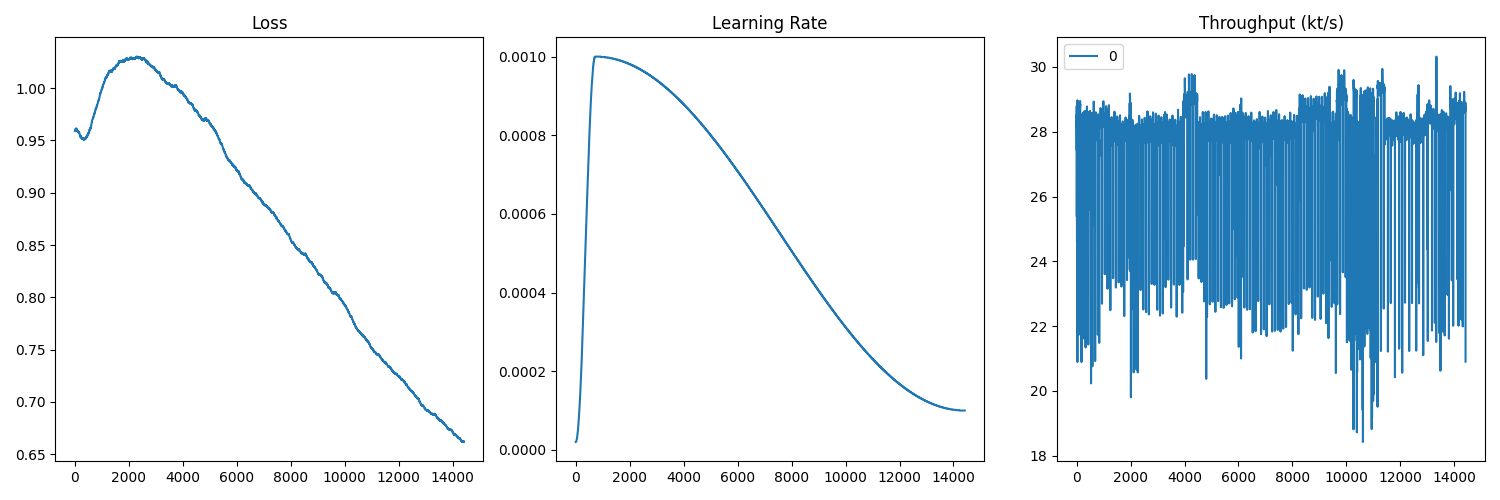

In [7]:
checkpoint_list = [
    # 'checkpoints/train-round2-masked-370M/checkpoint-649/train_logs.pt',
    # 'checkpoints/train-round1-135M-sft/checkpoint-done/train_logs.pt',
    # 'checkpoints/train-round2-135M-sft/checkpoint-done/train_logs.pt',
    'checkpoints/train-round3-135M-sft/checkpoint-done/train_logs.pt',
    # 'checkpoints/train-round3-135M/checkpoint-done/train_logs.pt',
    # 'checkpoints/train-round1-135M/checkpoint-19000/train_logs.pt',
    # 'checkpoints/train-round2-135M/checkpoint-21000/train_logs.pt',
    #'checkpoints/train-round1-masked-135M/checkpoint-1292/train_logs.pt',
    # 'checkpoints/train-round2-135M/checkpoint-1500/train_logs.pt'
]
logs_list = [torch.load(c) for c in checkpoint_list]

mean = lambda seq: sum(seq) / len(seq)
median = lambda seq: sorted(seq)[len(seq) // 2]

plot_train_logs(logs_list, 0.999)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
probs = torch.tensor([[0., torch.inf]], dtype=torch.float16)
# target = torch.tensor([0])
# loss(probs, target)

In [ ]:
-torch.log(probs + 1e-7)

In [ ]:
torch.finfo(torch.bfloat16).eps

In [ ]:
torch.tensor([1e-8], dtype=torch.float16)